# Import the Necessary Library

In [43]:
import pandas as pd
import re
import string
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import time
#Ensure that necessary NLTK resources are downloaded for text processing
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import The Dataset

In [44]:
# Load review data from a CSV file
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Categorize rating into 3 types

In [45]:
# Function to simplify ratings into three categories
def rating(score):
    #Convert numerical score into categorical rating
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Balanced'
    else:
        return 'Negative'
    
# Apply the rating function to the 'Rating' column
df['Rating'] = df['Rating'].apply(rating)

# Text preprocessing functions

In [46]:
# Text preprocessing function to clean text
def clean_text(text):
    #Lowercase, remove numbers, and punctuation from text
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function to remove stopwords from text
def remove_stopwords(text):
    #Remove stopwords from text to reduce dimensionality
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Function to apply stemming to text
def stem_text(text):
    #Apply stemming to reduce words to their root form
    stemmer = PorterStemmer()
    words = text.split()
    return ' '.join([stemmer.stem(word) for word in words])

# Function to apply lemmatization to text
def lemmatize_text(text):
    #Lemmatize text to reduce words to their dictionary form
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Comparing stemming and lemmatization preprocessing

In [47]:
def compare_stem_lem(df):
    #Apply both stemming and lemmatization to the text and compare model performance with baseline
    df['Cleaned'] = df['Review'].apply(clean_text).apply(remove_stopwords)
    df['Stemmed'] = df['Cleaned'].apply(stem_text)
    df['Lemmatized'] = df['Cleaned'].apply(lemmatize_text)

    # Vectorize text and prepare for model training
    vectorizer = TfidfVectorizer()
    X_clean = vectorizer.fit_transform(df['Cleaned'])
    X_stem = vectorizer.fit_transform(df['Stemmed'])
    X_lem = vectorizer.fit_transform(df['Lemmatized'])
    y = df['Rating']

    # Evaluate model performance
    model = LogisticRegression(max_iter=1000)
    accuracy_base = test_preprocess(X_clean, y)
    accuracy_stem = test_preprocess(X_stem, y)
    accuracy_lem = test_preprocess(X_lem, y)

    return accuracy_base, accuracy_stem, accuracy_lem

# Function to train and test model using logistic regression
def test_preprocess(X, y):
    # Split data, train model, and calculate accuracy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

# Run the comparison and print results
accuracy_base, accuracy_stem, accuracy_lem = compare_stem_lem(df)
comparison_df = pd.DataFrame({
    'Method': ['Baseline', 'Stemming', 'Lemmatization'],
    'Accuracy': [accuracy_base, accuracy_stem, accuracy_lem]
})
print(comparison_df)

          Method  Accuracy
0       Baseline  0.856794
1       Stemming  0.857770
2  Lemmatization  0.856794


# Wordcloud

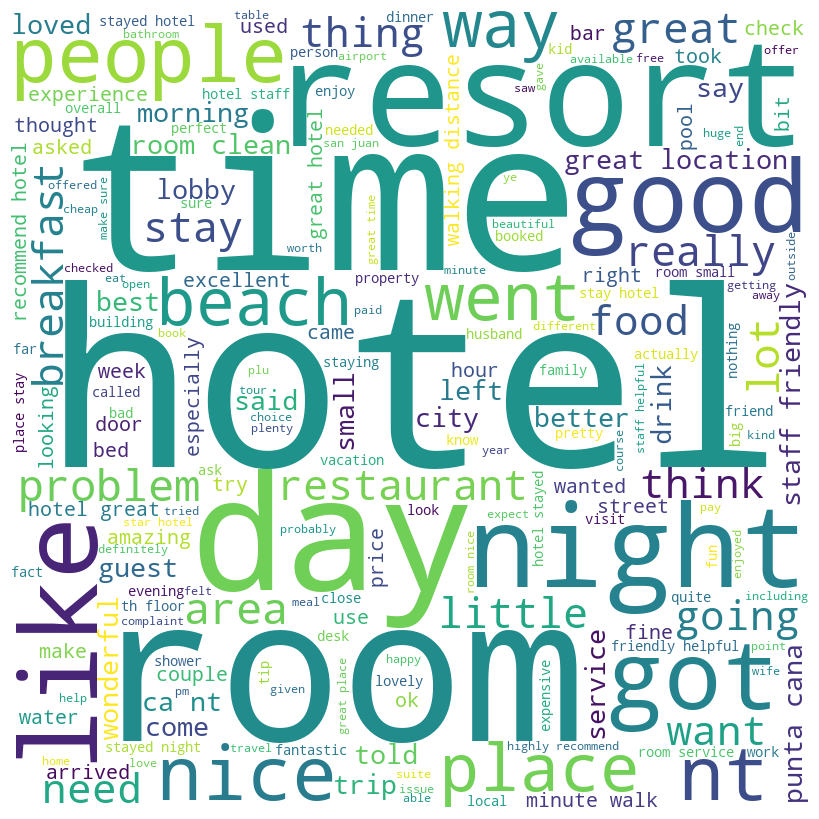

In [48]:
cleaned_text = df['Review'].apply(clean_text).apply(remove_stopwords).apply(lemmatize_text)
wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color ='white',
    stopwords = stopwords.words('english'),
    min_font_size = 10
).generate(" ".join(cleaned_text))

#Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# A function for testing different models

In [49]:
def test_models(X, y):
    # Define models to test
    models = [
        DecisionTreeClassifier(),
        LogisticRegression(max_iter=1000),
        SVC(),
        RandomForestClassifier()
    ]
    model_names = ['Decision Tree', 'Logistic Regression', 'SVC', 'Random Forest']
    accuracies = []
    
    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train and evaluate models
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
    
    # Combine model names and accuracies into a DataFrame and display it
    accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
    return accuracy_df

# Testing the different models

                 Model  Accuracy
0        Decision Tree  0.738961
1  Logistic Regression  0.856794
2                  SVC  0.854355
3        Random Forest  0.786777


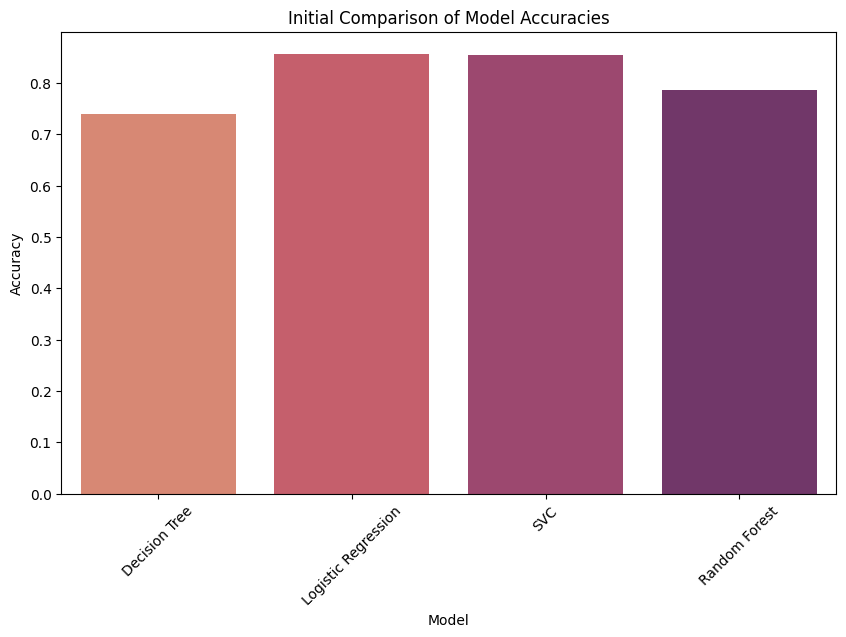

In [50]:
# Initial vectorization and model testing
vectorizer = TfidfVectorizer()
X_initial = vectorizer.fit_transform(cleaned_text)
y_initial = df['Rating']
accuracy_df_initial = test_models(X_initial, y_initial)

print(accuracy_df_initial)

# Display initial model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df_initial, palette='flare')
plt.title('Initial Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.show()


# N-gram configurations

In [51]:
configurations = {
    'Unigrams': ((1, 1), 1000),
    'Bigrams': ((2, 2), 1000),
    'Uni_Bi_Trigrams': ((1, 3), 1000),
    'Unigrams_All_Features': ((1, 1), None),
    'Bigrams_All_Features': ((2, 2), None),
    'Uni_Bi_Trigrams_All_Features': ((1, 3), None)
}


# A function for testing different N-gram configurations

In [52]:
results = {}

def test_ngram(X, y):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, predictions)
    test_time = end_time - start_time
    return accuracy, test_time

# Testing different n-gram configurations and showing the results

                              Accuracy  Testing Time
Unigrams                      0.851427      0.289575
Bigrams                       0.802391      0.134584
Uni_Bi_Trigrams               0.853867      0.256621
Unigrams_All_Features         0.857770      1.070697
Bigrams_All_Features          0.762381      5.914545
Uni_Bi_Trigrams_All_Features  0.818736     28.579087


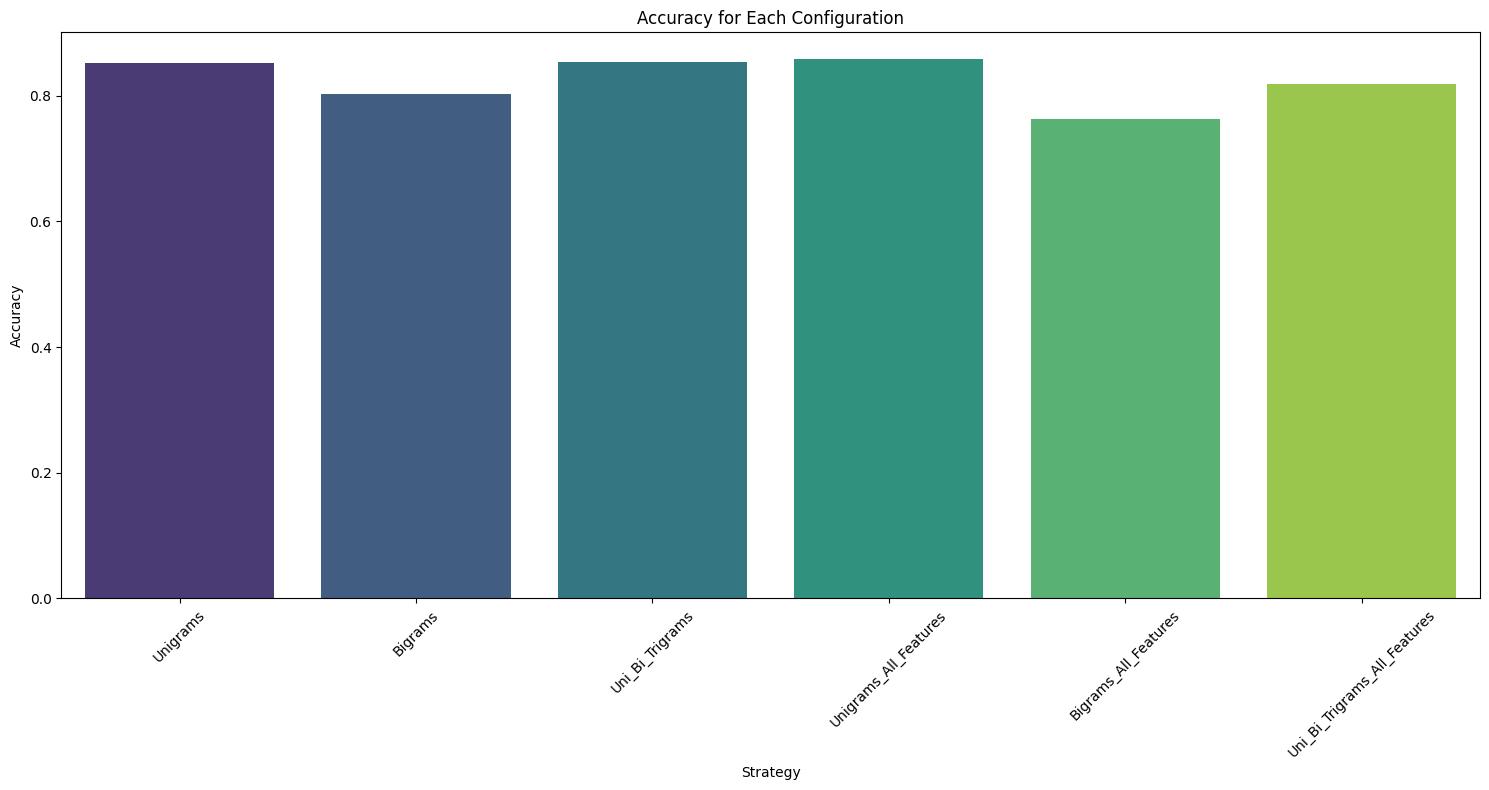

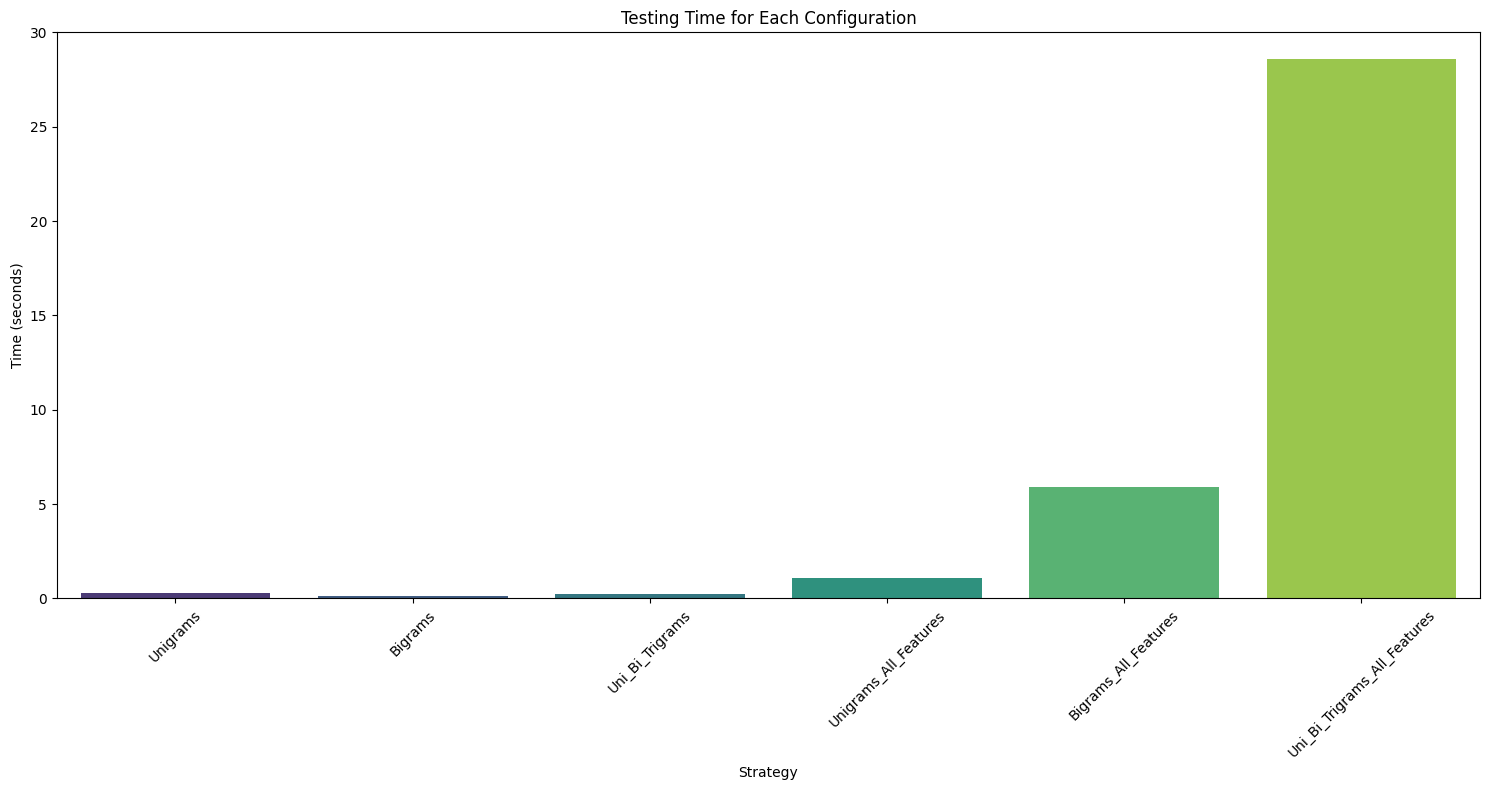

In [53]:
# Preprocess data
df['Processed'] = df['Review'].apply(clean_text).apply(remove_stopwords).apply(stem_text)

# Testing configurations
for config_name, ((ngram_min, ngram_max), max_features) in configurations.items():
    vectorizer = TfidfVectorizer(ngram_range=(ngram_min, ngram_max), max_features=max_features)
    X = vectorizer.fit_transform(df['Processed'])
    y = df['Rating']
    accuracy = test_ngram(X, y)
    results[config_name] = accuracy

# Convert the results dictionary to a DataFrame for plotting and printing the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Testing Time'])
print(results_df)

# Plotting results
plt.figure(figsize=(15, 8))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy for Each Configuration')
plt.xlabel('Strategy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout() 

plt.figure(figsize=(15, 8))
sns.barplot(x=results_df.index, y='Testing Time', data=results_df, palette='viridis')
plt.title('Testing Time for Each Configuration')
plt.xlabel('Strategy')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()
